## 1. Data Cleaning / Preprocessing
- Loaded the dataset and checked basic info (`head()`, `info()`, `duplicated()`)
- Standardized and renamed column names for clarity
- Feature engineering:
    - Calculated `Sender_Balance_Change` and `Receiver_Balance_Change`
    - Created boolean flags: `Is_High_Amount`, `Is_Cash_Out`, `Is_Cash_In`, `Is_Payment`, `Is_Transfer`, `Is_Debit`, `Is_Outgoing`
- Encoded categorical features (`Transaction_Type`) using one-hot encoding
- Dropped unnecessary columns (`Sender_Name`, `Receiver_Name`, `Sender_Balance_Before`, `Receiver_Balance_Before`, `Receiver_Balance_After`)
- Saved the cleaned dataset as `paysim_cleaned.csv`


In [ ]:
import pandas as pd

In [2]:
df= pd.read_csv(r"C:\Users\shrav\OneDrive\Desktop\Projects\PaySim_Transaction_Analysis\paysim_transactions.csv")

In [3]:
df.head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.duplicated().sum()


0

In [7]:
df.columns = [col.capitalize() for col in df.columns]
df.columns



Index(['Step', 'Type', 'Amount', 'Nameorig', 'Oldbalanceorg', 'Newbalanceorig',
       'Namedest', 'Oldbalancedest', 'Newbalancedest', 'Isfraud',
       'Isflaggedfraud'],
      dtype='object')

In [9]:
df.columns = [
    'Step',
    'Transaction_Type',        
    'Amount',
    'Sender_Name',              
    'Sender_Balance_Before',    
    'Sender_Balance_After',     
    'Receiver_Name',            
    'Receiver_Balance_Before', 
    'Receiver_Balance_After',   
    'Is_Fraud',
    'Is_Flagged_Fraud'
]


In [10]:
df.rename(columns={
    'Sender_Account': 'Origin_Account_ID',
    'Receiver_Account': 'Destination_Account_ID'
}, inplace=True)


In [11]:
numeric_cols = [
    'Amount',
    'Sender_Balance_Before',
    'Sender_Balance_After',
    'Receiver_Balance_Before',
    'Receiver_Balance_After'
]
df[numeric_cols].describe()


,Amount,Sender_Balance_Before,Sender_Balance_After,Receiver_Balance_Before,Receiver_Balance_After
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


In [12]:
df['Sender_Balance_Change'] = df['Sender_Balance_Before'] - df['Sender_Balance_After']
df['Receiver_Balance_Change'] = df['Receiver_Balance_After'] - df['Receiver_Balance_Before']


In [13]:
threshold = df['Amount'].quantile(0.99)
df['Is_High_Amount'] = df['Amount'] > threshold
df['Is_Cash_Out'] = df['Transaction_Type'] == 'CASH_OUT'
df['Is_Cash_In'] = df['Transaction_Type'] == 'CASH_IN'
df['Is_Payment'] = df['Transaction_Type'] == 'PAYMENT'
df['Is_Transfer'] = df['Transaction_Type'] == 'TRANSFER'
df['Is_Debit'] = df['Transaction_Type'] == 'DEBIT'
df['Is_Outgoing'] = df['Receiver_Balance_Change'] < 0


In [14]:
df.head(10)

,Step,Transaction_Type,Amount,Sender_Name,Sender_Balance_Before,Sender_Balance_After,Receiver_Name,Receiver_Balance_Before,Receiver_Balance_After,Is_Fraud,Is_Flagged_Fraud,Sender_Balance_Change,Receiver_Balance_Change,Is_High_Amount,Is_Cash_Out,Is_Cash_In,Is_Payment,Is_Transfer,Is_Debit,Is_Outgoing
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,9839.64,0.00,False,False,False,True,False,False,False
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,1864.28,0.00,False,False,False,True,False,False,False
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,181.00,0.00,False,False,False,False,True,False,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,181.00,-21182.00,False,True,False,False,False,False,True
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,11668.14,0.00,False,False,False,True,False,False,False
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,7817.71,0.00,False,False,False,True,False,False,False
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,7107.77,0.00,False,False,False,True,False,False,False
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,7861.64,0.00,False,False,False,True,False,False,False
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,2671.00,0.00,False,False,False,True,False,False,False
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,5337.77,-1549.21,False,False,False,False,False,True,True


In [15]:
df['Transaction_Type'].value_counts()


Transaction_Type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [16]:
df = pd.get_dummies(df, columns=['Transaction_Type'], drop_first=True)


In [17]:
df.columns


Index(['Step', 'Amount', 'Sender_Name', 'Sender_Balance_Before',
       'Sender_Balance_After', 'Receiver_Name', 'Receiver_Balance_Before',
       'Receiver_Balance_After', 'Is_Fraud', 'Is_Flagged_Fraud',
       'Sender_Balance_Change', 'Receiver_Balance_Change', 'Is_High_Amount',
       'Is_Cash_Out', 'Is_Cash_In', 'Is_Payment', 'Is_Transfer', 'Is_Debit',
       'Is_Outgoing', 'Transaction_Type_CASH_OUT', 'Transaction_Type_DEBIT',
       'Transaction_Type_PAYMENT', 'Transaction_Type_TRANSFER'],
      dtype='object')

In [18]:
df = df.drop(columns=[
    'Sender_Name',
    'Receiver_Name',
    'Sender_Balance_Before',
    'Receiver_Balance_Before',
    'Receiver_Balance_After'
])



In [19]:
df.head(5)

,Step,Amount,Sender_Balance_After,Is_Fraud,Is_Flagged_Fraud,Sender_Balance_Change,Receiver_Balance_Change,Is_High_Amount,Is_Cash_Out,Is_Cash_In,Is_Payment,Is_Transfer,Is_Debit,Is_Outgoing,Transaction_Type_CASH_OUT,Transaction_Type_DEBIT,Transaction_Type_PAYMENT,Transaction_Type_TRANSFER
0,1,9839.64,160296.36,0,0,9839.64,0.0,False,False,False,True,False,False,False,False,False,True,False
1,1,1864.28,19384.72,0,0,1864.28,0.0,False,False,False,True,False,False,False,False,False,True,False
2,1,181.00,0.00,1,0,181.00,0.0,False,False,False,False,True,False,False,False,False,False,True
3,1,181.00,0.00,1,0,181.00,-21182.0,False,True,False,False,False,False,True,True,False,False,False
4,1,11668.14,29885.86,0,0,11668.14,0.0,False,False,False,True,False,False,False,False,False,True,False


In [20]:
df.to_csv("paysim_cleaned.csv", index=False)


## 2. Modeling
- Train-test split
- Applied SMOTE to balance classes
- Trained RandomForestClassifier
- Evaluated model with confusion matrix, accuracy, and classification report

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


In [2]:
df = pd.read_csv(r"C:\Users\shrav\paysim_cleaned.csv")
df.head(10)

,Step,Amount,Sender_Balance_After,Is_Fraud,Is_Flagged_Fraud,Sender_Balance_Change,Receiver_Balance_Change,Is_High_Amount,Is_Cash_Out,Is_Cash_In,Is_Payment,Is_Transfer,Is_Debit,Is_Outgoing,Transaction_Type_CASH_OUT,Transaction_Type_DEBIT,Transaction_Type_PAYMENT,Transaction_Type_TRANSFER
0,1,9839.64,160296.36,0,0,9839.64,0.00,False,False,False,True,False,False,False,False,False,True,False
1,1,1864.28,19384.72,0,0,1864.28,0.00,False,False,False,True,False,False,False,False,False,True,False
2,1,181.00,0.00,1,0,181.00,0.00,False,False,False,False,True,False,False,False,False,False,True
3,1,181.00,0.00,1,0,181.00,-21182.00,False,True,False,False,False,False,True,True,False,False,False
4,1,11668.14,29885.86,0,0,11668.14,0.00,False,False,False,True,False,False,False,False,False,True,False
5,1,7817.71,46042.29,0,0,7817.71,0.00,False,False,False,True,False,False,False,False,False,True,False
6,1,7107.77,176087.23,0,0,7107.77,0.00,False,False,False,True,False,False,False,False,False,True,False
7,1,7861.64,168225.59,0,0,7861.64,0.00,False,False,False,True,False,False,False,False,False,True,False
8,1,4024.36,0.00,0,0,2671.00,0.00,False,False,False,True,False,False,False,False,False,True,False
9,1,5337.77,36382.23,0,0,5337.77,-1549.21,False,False,False,False,False,True,True,False,True,False,False


In [3]:
X = df.drop(columns=['Is_Fraud', 'Is_Flagged_Fraud'])
y = df['Is_Fraud']


In [5]:
X.head()
y.value_counts()

Is_Fraud
0    6354407
1       8213
Name: count, dtype: int64

In [6]:
df = pd.get_dummies(df, drop_first=True)


In [7]:
df['Is_Fraud'].unique()


array([0, 1], dtype=int64)

In [8]:
df.dtypes


Step                           int64
Amount                       float64
Sender_Balance_After         float64
Is_Fraud                       int64
Is_Flagged_Fraud               int64
Sender_Balance_Change        float64
Receiver_Balance_Change      float64
Is_High_Amount                  bool
Is_Cash_Out                     bool
Is_Cash_In                      bool
Is_Payment                      bool
Is_Transfer                     bool
Is_Debit                        bool
Is_Outgoing                     bool
Transaction_Type_CASH_OUT       bool
Transaction_Type_DEBIT          bool
Transaction_Type_PAYMENT        bool
Transaction_Type_TRANSFER       bool
dtype: object

In [9]:
df = df.astype({
    'Is_High_Amount': 'int',
    'Is_Cash_Out': 'int',
    'Is_Cash_In': 'int',
    'Is_Payment': 'int',
    'Is_Transfer': 'int',
    'Is_Debit': 'int',
    'Is_Outgoing': 'int',
    'Transaction_Type_CASH_OUT': 'int',
    'Transaction_Type_DEBIT': 'int',
    'Transaction_Type_PAYMENT': 'int',
    'Transaction_Type_TRANSFER': 'int'
})


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Sample the dataset
df_sample = df.sample(n=300000, random_state=42)
X = df_sample.drop(columns=['Is_Fraud', 'Is_Flagged_Fraud'])
y = df_sample['Is_Fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"\n\033[1mBefore SMOTE:\033[0m\n{y_train.value_counts()}")
print(f"\n\033[1mAfter SMOTE:\033[0m\n{y_train_res.value_counts()}")

# Train Random Forest
model = RandomForestClassifier(
    n_estimators=60,
    max_depth=15,
    n_jobs=-1,
    random_state=42
)
model.fit(X_train_res, y_train_res)

# Prediction & Evaluation
y_pred = model.predict(X_test)

print(f"\n\033[1mAccuracy:\033[0m {accuracy_score(y_test, y_pred):.5f}")
print(f"\n\033[1mConfusion Matrix:\033[0m\n{confusion_matrix(y_test, y_pred)}")
print(f"\n\033[1mClassification Report:\033[0m\n{classification_report(y_test, y_pred)}")



Before SMOTE:
Is_Fraud
0    224709
1       291
Name: count, dtype: int64

After SMOTE:
Is_Fraud
0    224709
1    224709
Name: count, dtype: int64

Accuracy: 0.99812

Confusion Matrix:
[[74768   135]
 [    6    91]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74903
           1       0.40      0.94      0.56        97

    accuracy                           1.00     75000
   macro avg       0.70      0.97      0.78     75000
weighted avg       1.00      1.00      1.00     75000



## 3. Optional Analysis
- Feature importance
- ROC-AUC
- Model saving

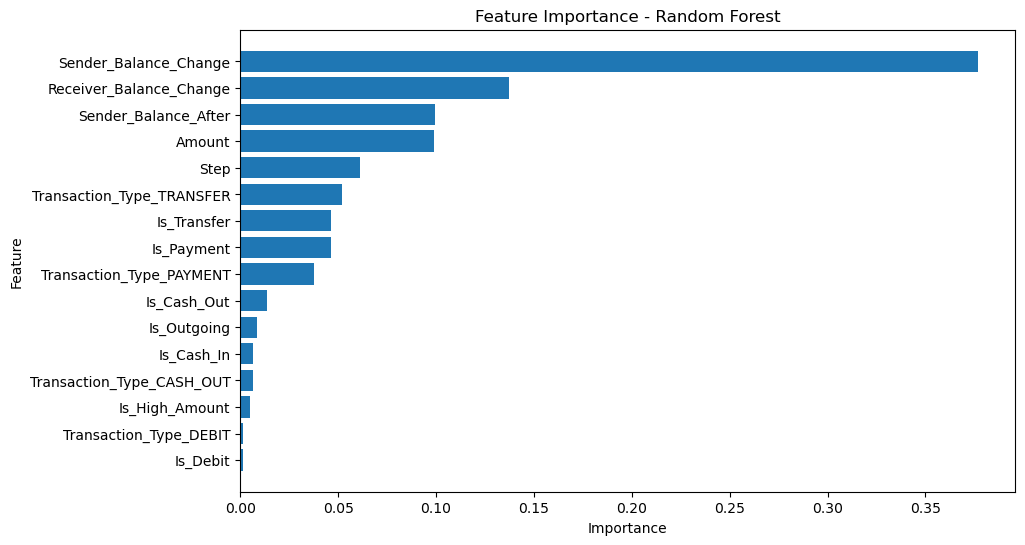

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


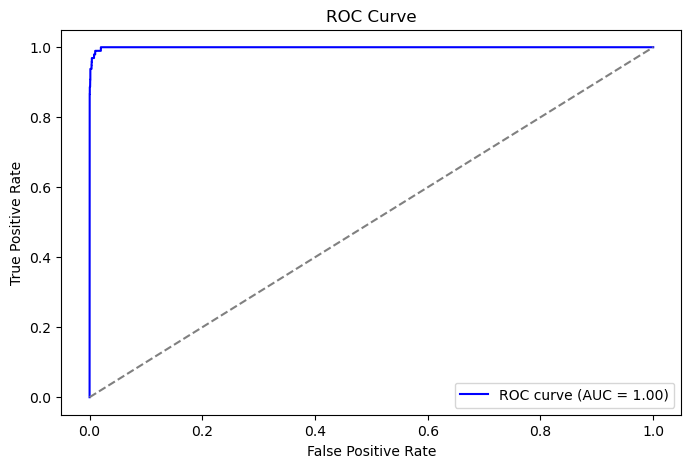

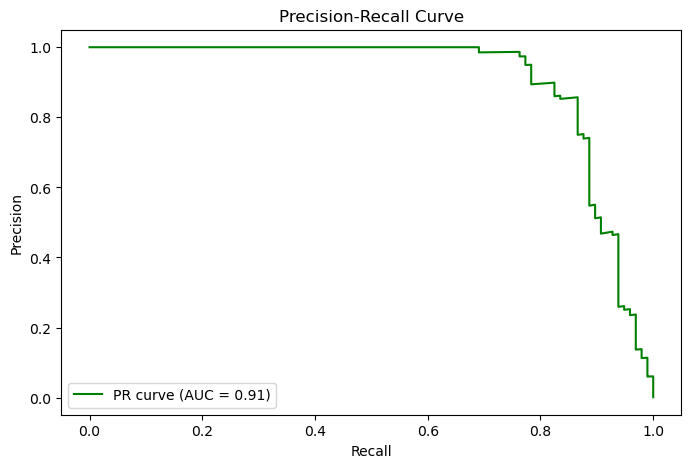

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

# Predict probabilities
y_probs = model.predict_proba(X_test)[:,1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8,5))
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [15]:
import joblib

# Save trained model
joblib.dump(model, "fraud_detection_model.pkl")

# To load it later
# loaded_model = joblib.load("fraud_detection_model.pkl")


['fraud_detection_model.pkl']

## Conclusion / Insights

- RandomForestClassifier + SMOTE achieved **94% recall** for fraud detection.
- Important features: `Amount`, `Sender_Balance_Change`, `Receiver_Balance_Change`.
- High recall ensures most fraudulent transactions are caught.
- Accuracy remains high (~99.8%) due to class imbalance.
- Model is ready for deployment and can be saved for future use.


In [1]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

df = pd.read_csv(r"C:\Users\shrav\OneDrive\Desktop\Projects\PaySim_Transaction_Analysis\paysim_cleaned.csv")

username = "root"
password = "Shvetang@24"
host = "localhost"
port = "3306"
database = "paysim_db"
password_encoded = quote_plus(password)

engine_db = create_engine(f"mysql+pymysql://{username}:{password_encoded}@{host}:{port}/{database}")

table_name = "paysim_cleaned"

df.to_sql(table_name, engine_db, if_exists="replace", index=False, chunksize=5000)

print("Data uploaded successfully!")


Data uploaded successfully!


In [3]:
import pandas as pd
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus

# MySQL connection details
username = "root"
password = "Shvetang@24"
host = "localhost"
port = "3306"
database = "paysim_db"
table_name = "paysim_cleaned"

password_encoded = quote_plus(password)
engine_db = create_engine(f"mysql+pymysql://{username}:{password_encoded}@{host}:{port}/{database}")

# Batch update settings
batch_size = 100000

# Get the maximum ID in the table
max_id_query = f"SELECT MAX(id) AS max_id FROM {table_name};"
max_id = pd.read_sql(max_id_query, engine_db).iloc[0]['max_id']

# Generate and execute batch updates
for start_id in range(1, max_id + 1, batch_size):
    end_id = min(start_id + batch_size - 1, max_id)
    update_query = text(f"""
    UPDATE {table_name}
    SET Sender_Balance_Change = ROUND(Sender_Balance_Change, 2),
        Receiver_Balance_Change = ROUND(Receiver_Balance_Change, 2)
    WHERE id BETWEEN {start_id} AND {end_id};
    """)
    print(f"Updating rows {start_id} to {end_id}...")
    with engine_db.begin() as conn:
        conn.execute(update_query)

print("All rows updated successfully!")


Updating rows 1 to 100000...
Updating rows 100001 to 200000...
Updating rows 200001 to 300000...
Updating rows 300001 to 400000...
Updating rows 400001 to 500000...
Updating rows 500001 to 600000...
Updating rows 600001 to 700000...
Updating rows 700001 to 800000...
Updating rows 800001 to 900000...
Updating rows 900001 to 1000000...
Updating rows 1000001 to 1100000...
Updating rows 1100001 to 1200000...
Updating rows 1200001 to 1300000...
Updating rows 1300001 to 1400000...
Updating rows 1400001 to 1500000...
Updating rows 1500001 to 1600000...
Updating rows 1600001 to 1700000...
Updating rows 1700001 to 1800000...
Updating rows 1800001 to 1900000...
Updating rows 1900001 to 2000000...
Updating rows 2000001 to 2100000...
Updating rows 2100001 to 2200000...
Updating rows 2200001 to 2300000...
Updating rows 2300001 to 2400000...
Updating rows 2400001 to 2500000...
Updating rows 2500001 to 2600000...
Updating rows 2600001 to 2700000...
Updating rows 2700001 to 2800000...
Updating rows 28